In [24]:
import pandas as pd 
import numpy as np
from sklearn.datasets import load_boston,load_iris
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as  plt 

In [8]:
bsd_data = load_boston()
X = bsd_data['data']
y = bsd_data['target']

In [69]:
# 鸢尾花 
iris_data = load_iris()
x_iris = iris_data['data']
y = iris_data['target']
x_iris.shape
y.shape

(150,)

ValueError: X has 2 features, but SVC is expecting 4 features as input.

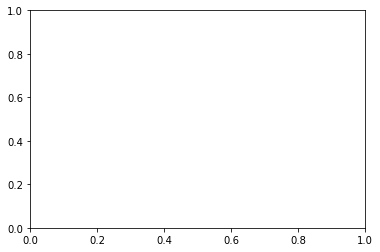

In [71]:
# 支持向量机
from sklearn.svm import SVC
# 训练
models = SVC(kernel='linear')
models.fit(x_iris,y)
plot_svc_decision_function(model=models)

In [61]:
# 绘制支持向量机效果图
def plot_svc_decision_function(model,ax=None,plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(),Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    # 决策边界
    ax.contour(X,Y,P,colors='k',levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])
    # support vector
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                   model.support_vectors_[:,1],
                   s=300,linewidth=1,facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

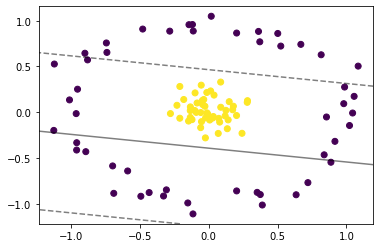

In [77]:
# 核函数的使用
from sklearn.datasets import make_circles
# 绘制一份数据集
X,y = make_circles(100,factor=.1,noise=.1)
x_1 = X[:,0]
x_2 = X[:,1]
svc_l = SVC(kernel='linear').fit(X,y)
plt.scatter(x_1,x_2,c=y)
plot_svc_decision_function(svc_l)

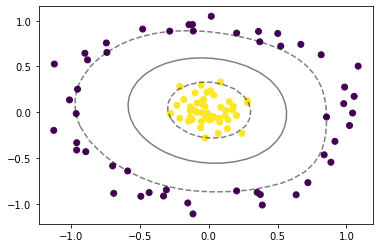

In [81]:
svc_l = SVC(kernel='rbf').fit(X,y)
plt.scatter(x_1,x_2,c=y)
plot_svc_decision_function(svc_l)

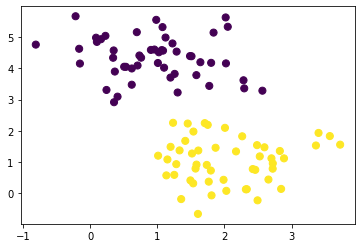

In [89]:
from sklearn.datasets import make_blobs
# 松弛因子（正则化惩罚项C）
X,y = make_blobs(n_samples=100,centers=2,random_state=0,cluster_std=0.7)
plt.scatter(X[:,0],X[:,1],c=y,s=50)

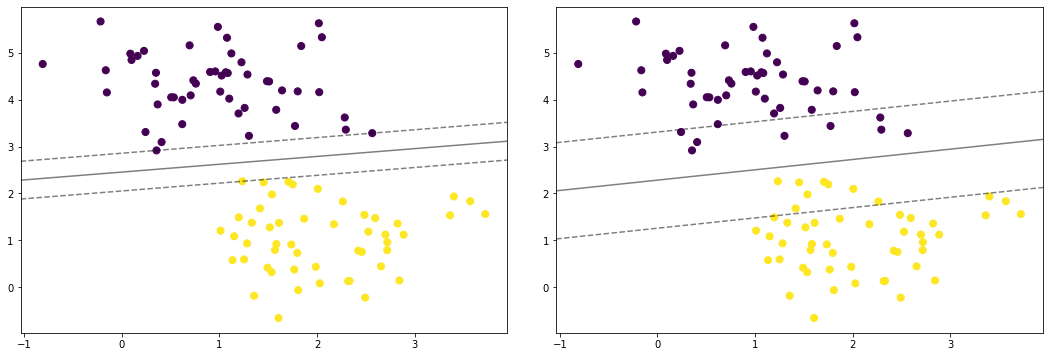

In [96]:
fig,ax = plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.0625,right=0.95,wspace=0.1)
for axi,C in zip(ax,[5,0.1]):
    model = SVC(kernel='linear',C=C).fit(X,y)
    axi.scatter(X[:,0],X[:,1],c=y,s=50)
    plot_svc_decision_function(model,ax=axi)